In [3]:
# set up working directory
import os
os.chdir('/Users/gaetanpinon/code_projects/hackathon_BioxAI/biohack')
# check working directory
os.getcwd()
print(os.getcwd())


# load dataset commercial_nac65.csv and nacc_processed.csv from data/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load dataset
# df = pd.read_csv('data/nacc/commercial_nacc65.csv')
df = pd.read_csv('data/nacc/nacc_processed.csv')

/Users/gaetanpinon/code_projects/hackathon_BioxAI/biohack


/var/folders/d7/k100c7y9141ckwg6_stkvkf40000gn/T/ipykernel_39767/2636969084.py:19: DtypeWarning: Columns (2,42,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/nacc/nacc_processed.csv')


In [4]:
# show everything when printing
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Explore nacc_processed.csv

In [5]:
# explore df
display(df.head())

# summary df
print(df.info())

# print all columns names, show all even if there are many, avoid the ...
print(list(df.columns))

# number of columns and rows
print(df.shape)

# summary statistics
print(df.describe())

,NACCADC,NACCID,NACCNIHR,MEMANTINE,DONEPEZIL,RIVASTIGMINE,GALANTAMINE,VISIT,SEX,NACCNRYR,EDUC,INDEPEND,INLIVWTH,NACCFAM,NACCAM,NACCFFTD,NACCAMD,NACCAHTN,NACCHTNC,NACCACEI,NACCAAAS,NACCBETA,NACCCCBS,NACCDIUR,NACCVASD,NACCANGI,NACCLIPL,NACCNSD,NACCAC,NACCADEP,NACCAPSY,NACCAANX,NACCPDMD,NACCEMD,NACCDBMD,SMOKYRS,CVHATT,CBSTROKE,CBTIA,PD,TBI,DIABETES,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ALCOHOL,ABUSOTHR,PTSD,BIPOLAR,SCHIZ,DEPOTHR,ANXIETY,OCD,NPSYDEV,NACCBMI,BPSYS,VISION,HEARING,SOMATIC,EMOT,HXHYPER,FOCLSIGN,HACHIN,CVDCOG,CVDIMAG1,PDNORMAL,CDRGLOB,MEMORY,ORIENT,JUDGMENT,CDRSUM,COMPORT,CDRLANG,DELSEV,HALLSEV,AGITSEV,DEPDSEV,ANXSEV,ELATSEV,APASEV,DISNSEV,IRRSEV,MOTSEV,NITESEV,APPSEV,NORMEXAM,ALSFIND,DECCLIN,COGMODE,MOMODE,NACCMMSE,NACCMOCA,COGSTAT,NACCUDSD,AMYLCSF,CSFTAU,EPILEP,SEIZURES,HIV,OTHCOG,DEP,NACCGDS,BIPOLDX,SCHIZOP,ANXIET,DELIR,PTSDDX,OTHPSY,ALCDEM,DYSILL,MEDS,FAQ,SLEEP,BPSYS_Missing,FAQ_Missing,NACCBMI_Missing,NACCGDS_Missing,NACCMMSE_Missing,NACCMOCA_Missing,SMOKYRS_Missing,AGITSEV_Missing,ANXSEV_Missing,APASEV_Missing,APPSEV_Missing,CDRLANG_Missing,COGSTAT_Missing,COMPORT_Missing,DELSEV_Missing,DEPDSEV_Missing,DISNSEV_Missing,EDUC_Missing,ELATSEV_Missing,HALLSEV_Missing,INDEPEND_Missing,IRRSEV_Missing,MOMODE_Missing,MOTSEV_Missing,NITESEV_Missing,HACHIN_Missing
0,186,NACC003487,1.0,0,0,0,0,66.955023,0,8888.0,16.0,1.0,1.0,0.0,Missing,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.7,149.0,Missing,1.0,Missing,Missing,Missing,Missing,0.721736,Missing,Missing,Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.5,-0.238433,0.135697,-0.334292,-0.249217,-0.294399,0.062749,0.048845,0.288738,-1.192688,0.609719,-0.450954,-0.495254,0.0,0.0,Missing,0.0,0.0,25.336679,23.0,2.0,1.0,Missing,Missing,0.0,0.0,0.0,0.0,0,1.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,1.0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1,1,0,1,1,0,1,0,1,1,1
1,186,NACC004687,1.0,0,0,0,0,77.785616,0,8888.0,12.0,1.0,0.0,Missing,Missing,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,148.0,0.0,0.0,Missing,Missing,Missing,Missing,0.500327,Missing,Missing,Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Missing,0.0,0.0,32.223336,29.0,2.0,1.0,Missing,Missing,0.0,0.0,0.0,0.0,0,1.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,186,NACC008514,1.0,1,0,1,0,86.371689,0,8888.0,20.0,1.0,1.0,0.0,Missing,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,117.0,0.0,0.0,Missing,Missing,Missing,Missing,1.026312,Missing,Missing,Missing,0.5,0.5,0.0,0.5,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,Missing,1.0,1.0,27.507362,14.0,4.0,4.0,Missing,Missing,0.0,0.0,0.0,0.0,0,4.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2.5,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,186,NACC008514,1.0,0,0,1,0,87.468721,0,8888.0,20.0,3.0,1.0,0.0,Missing,0,8.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.141515,Missing,Missing,Missing,Missing,Missing,0.0,1.0,Missing,Missing,0.0,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,27.8,152.0,0.0,0.0,Missing,Missing,Missing,Missing,1.934489,Missing,Missing,Missing,0.5,1.0,0.5,0.5,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,Missing,1.0,1.0,26.533596,17.0,4.0,4.0,Missing,Missing,0.0,Missing,0.0,0.0,0,1.890801,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2.9,1.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,186,NACC013204,1.0,0,0,0,0,74.016438,0,8888.0,18.0,1.0,1.0,0.0,Missing,0,6.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154023 entries, 0 to 154022
Columns: 141 entries, NACCADC to HACHIN_Missing
dtypes: float64(36), int64(55), object(50)
memory usage: 165.7+ MB
None
['NACCADC', 'NACCID', 'NACCNIHR', 'MEMANTINE', 'DONEPEZIL', 'RIVASTIGMINE', 'GALANTAMINE', 'VISIT', 'SEX', 'NACCNRYR', 'EDUC', 'INDEPEND', 'INLIVWTH', 'NACCFAM', 'NACCAM', 'NACCFFTD', 'NACCAMD', 'NACCAHTN', 'NACCHTNC', 'NACCACEI', 'NACCAAAS', 'NACCBETA', 'NACCCCBS', 'NACCDIUR', 'NACCVASD', 'NACCANGI', 'NACCLIPL', 'NACCNSD', 'NACCAC', 'NACCADEP', 'NACCAPSY', 'NACCAANX', 'NACCPDMD', 'NACCEMD', 'NACCDBMD', 'SMOKYRS', 'CVHATT', 'CBSTROKE', 'CBTIA', 'PD', 'TBI', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'ARTHRIT', 'ALCOHOL', 'ABUSOTHR', 'PTSD', 'BIPOLAR', 'SCHIZ', 'DEPOTHR', 'ANXIETY', 'OCD', 'NPSYDEV', 'NACCBMI', 'BPSYS', 'VISION', 'HEARING', 'SOMATIC', 'EMOT', 'HXHYPER', 'FOCLSIGN', 'HACHIN', 'CVDCOG', 'CVDIMAG1', 'PDNORMAL', 'CDRGLOB', 'MEMORY', 'ORIENT', 'JUDGMENT', 'CDRSUM', '

In [6]:
# check how many distinct values in column 'NACCID'
print(df['NACCID'].nunique())

43169


In [7]:
# Percentage of missing values in CDRSUM
cdrsum_missing_percentage = df['CDRSUM'].isnull().mean() * 100
print(f"Percentage of missing values in CDRSUM: {cdrsum_missing_percentage:.2f}%")

# Percentage of missing values in CDRGLOB
cdrglob_missing_percentage = df['CDRGLOB'].isnull().mean() * 100
print(f"Percentage of missing values in CDRGLOB: {cdrglob_missing_percentage:.2f}%")

Percentage of missing values in CDRSUM: 0.00%
Percentage of missing values in CDRGLOB: 0.00%


In [8]:
# select BPSYS and BPSYS_Missing columns and display top 5 rows
display(df[['BPSYS', 'BPSYS_Missing']].head())
# count missing values in BPSYS column
print(df['BPSYS'].isnull().sum())
# count missing values in BPSYS_Missing column
print(df['BPSYS_Missing'].isnull().sum())

,BPSYS,BPSYS_Missing
0,149.0,0
1,148.0,0
2,117.0,0
3,152.0,0
4,137.0,0


0
0


# Processing

In [ ]:
from config import instrumental_variables, confounders, outcome_predictors, outcome

# # remove all columnn with _Missing
# df = df.loc[:, ~df.columns.str.contains('_Missing')]
# rename columns
df.rename(columns={'VISIT': 'AGE_AT_VISIT'}, inplace=True)
df.rename(columns={outcome: 'OUTCOME'}, inplace=True)
# # convert column NACCADC to string
# df['NACCADC'] = df['NACCADC'].astype(str)
# keep only columns in instrumental_variables, confounders, outcome_predictors, and outcome
columns_to_keep = ["NACCID", 'OUTCOME'] + instrumental_variables + confounders + outcome_predictors
df = df[columns_to_keep]

In [10]:
# CBSTROKE HYPERTEN EPILEP INLIVWTH CVDCOG NACCNIHR TBI DEPOTHR NACCFAM ALCDEM PD ALSFIND PTSD BIPOLAR SCHIZ ANXIETY ALCOHOL NPSYDEV DELIR PTSDDX COGMODE DECCLIN
strings_list = [
    "CBSTROKE", "HYPERTEN", "EPILEP", "INLIVWTH", "CVDCOG", "NACCNIHR", "TBI", 
    "DEPOTHR", "NACCFAM", "ALCDEM", "PD", "ALSFIND", "PTSD", "BIPOLAR", 
    "SCHIZ", "ANXIETY", "ALCOHOL", "NPSYDEV", "DELIR", "PTSDDX", "COGMODE", 
    "DECCLIN",
]
# set all the "Missing" in these columns to 0
df[strings_list] = df[strings_list].replace('Missing', 0)
# convert all the columns in strings_list to int
df[strings_list] = df[strings_list].astype(float)

In [11]:
# Step 1: Calculate FOLLOW_UP
df['FOLLOW_UP'] = df.groupby('NACCID')['AGE_AT_VISIT'].transform(lambda x: x.max() - x.min())

# Step 2: Filter out patients with FOLLOW_UP <= 3 years
df = df[df['FOLLOW_UP'] >= 3]

# Step 3: Add AGE_AT_FIRST_VISIT
df['AGE_AT_FIRST_VISIT'] = df.groupby('NACCID')['AGE_AT_VISIT'].transform('min')

# display the first 5 rows of the resulting DataFrame where AGE_AT_VISIT is equal to AGE_AT_FIRST_VISIT
display(df[df['AGE_AT_VISIT'] == df['AGE_AT_FIRST_VISIT']].head())

# create df_after_3_years where AGE_AT_VISIT - AGE_AT_FIRST_VISIT is >=3 and drop duplicates on NACCID
df_3years = df[df['AGE_AT_VISIT'] - df['AGE_AT_FIRST_VISIT'] >= 3]
# create new column AGE_AT_FIRST_VISIT_AFTER_3_YEARS which is the minimum AGE_AT_VISIT for each NACCID in df_after_3_years
df_3years['AGE_AT_FIRST_VISIT_AFTER_3_YEARS'] = df_3years.groupby('NACCID')['AGE_AT_VISIT'].transform('min')
# create df_3years where AGE_AT_VISIT is equal to AGE_AT_FIRST_VISIT_AFTER_3_YEARS and drop duplicates on NACCID
df_3years = df_3years[df_3years['AGE_AT_VISIT'] == df_3years['AGE_AT_FIRST_VISIT_AFTER_3_YEARS'].copy()].drop_duplicates(subset='NACCID')
# rename outcome column to OUTCOME_AFTER_3_YEARSn and keep only columns NACCID and OUTCOME_AFTER_3_YEARS
df_3years.rename(columns={'OUTCOME': 'OUTCOME_AFTER_3_YEARS'}, inplace=True)
df_3years = df_3years[['NACCID', 'OUTCOME_AFTER_3_YEARS']]

# Join df with df_3years on NACCID
df = df.merge(df_3years, on='NACCID', how='left')
# only keep rows where AGE_AT_VISIT is equal to AGE_AT_FIRST_VISIT and drop duplicates on NACCID
df = df[df['AGE_AT_VISIT'] == df['AGE_AT_FIRST_VISIT']].drop_duplicates(subset='NACCID')
# rename OUTCOME to OUTCOME_AT_BASELINE
df.rename(columns={'OUTCOME': 'OUTCOME_AT_BASELINE'}, inplace=True)
# create a new column OUTCOME which is the difference between OUTCOME_AFTER_3_YEARS and OUTCOME_AT_BASELINE
df['OUTCOME'] = df['OUTCOME_AFTER_3_YEARS'] - df['OUTCOME_AT_BASELINE']

df = df[columns_to_keep]

# Display resulting DataFrame
display(df.head())

,NACCID,OUTCOME,BPSYS,CBSTROKE,HYPERTEN,NACCCCBS,NACCADC,EPILEP,AGE_AT_VISIT,INDEPEND,INLIVWTH,NACCAC,NACCBETA,NACCADEP,NACCPDMD,CVDCOG,NACCMOCA,NACCMMSE,FAQ,NACCGDS,CDRGLOB,NACCNIHR,SEX,EDUC,NACCBMI,TBI,NACCAPSY,DEPOTHR,NACCFAM,NACCFFTD,MEDS,ALCDEM,PD,ALSFIND,PTSD,BIPOLAR,SCHIZ,ANXIETY,ALCOHOL,NPSYDEV,DELIR,PTSDDX,COGMODE,MOMODE,JUDGMENT,COMPORT,CDRLANG,DECCLIN,FOLLOW_UP,AGE_AT_FIRST_VISIT
38,NACC120323,3.0,181.000000,0.0,1.0,0,186,0.0,80.243379,1.0,1.0,0,1,0,0,0.0,20.000000,26.635739,1.4,1.0,0.5,1.0,1,16.0,29.500000,0.0,0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.000000,0.000000,0.0,4.208904,80.243379
53,NACC141167,0.0,139.000000,0.0,1.0,0,186,0.0,67.508219,1.0,1.0,0,0,0,0,0.0,28.000000,21.379281,0.0,0.0,0.0,1.0,1,12.0,23.300000,0.0,0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3.221461,67.508219
113,NACC232927,9.0,119.000000,0.0,1.0,0,186,0.0,76.694064,3.0,1.0,0,0,0,0,0.0,17.000000,17.499384,3.0,5.0,1.0,1.0,0,16.0,27.100000,0.0,0,1.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.0,3.277397,76.694064
451,NACC817818,3.0,123.000000,0.0,1.0,0,186,0.0,74.196804,1.0,1.0,1,0,1,1,0.0,23.702048,33.480308,2.0,1.0,0.5,1.0,0,16.0,25.100000,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.5,0.000000,0.000000,0.0,3.066895,74.196804
548,NACC000385,5.0,124.948764,0.0,1.0,0,289,0.0,80.685845,1.0,1.0,1,0,0,0,0.0,15.886937,24.000000,1.1,1.0,1.0,1.0,0,16.0,25.802091,0.0,0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.743914,0.214128,1.0,6.244521,80.685845


/var/folders/d7/k100c7y9141ckwg6_stkvkf40000gn/T/ipykernel_39767/1604714440.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3years['AGE_AT_FIRST_VISIT_AFTER_3_YEARS'] = df_3years.groupby('NACCID')['AGE_AT_VISIT'].transform('min')


,NACCID,OUTCOME,BPSYS,CBSTROKE,HYPERTEN,NACCCCBS,NACCADC,EPILEP,AGE_AT_VISIT,INDEPEND,INLIVWTH,NACCAC,NACCBETA,NACCADEP,NACCPDMD,CVDCOG,NACCMOCA,NACCMMSE,FAQ,NACCGDS,CDRGLOB,NACCNIHR,SEX,EDUC,NACCBMI,TBI,NACCAPSY,DEPOTHR,NACCFAM,NACCFFTD,MEDS,ALCDEM,PD,ALSFIND,PTSD,BIPOLAR,SCHIZ,ANXIETY,ALCOHOL,NPSYDEV,DELIR,PTSDDX,COGMODE,MOMODE,JUDGMENT,COMPORT,CDRLANG,DECCLIN
0,NACC120323,11.0,181.000000,0.0,1.0,0,186,0.0,80.243379,1.0,1.0,0,1,0,0,0.0,20.000000,26.635739,1.4,1.0,0.5,1.0,1,16.0,29.500000,0.0,0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.000000,0.000000,0.0
3,NACC141167,0.0,139.000000,0.0,1.0,0,186,0.0,67.508219,1.0,1.0,0,0,0,0,0.0,28.000000,21.379281,0.0,0.0,0.0,1.0,1,12.0,23.300000,0.0,0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
6,NACC232927,-1.0,119.000000,0.0,1.0,0,186,0.0,76.694064,3.0,1.0,0,0,0,0,0.0,17.000000,17.499384,3.0,5.0,1.0,1.0,0,16.0,27.100000,0.0,0,1.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000,0.0
9,NACC817818,2.5,123.000000,0.0,1.0,0,186,0.0,74.196804,1.0,1.0,1,0,1,1,0.0,23.702048,33.480308,2.0,1.0,0.5,1.0,0,16.0,25.100000,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.5,0.000000,0.000000,0.0
11,NACC000385,0.0,124.948764,0.0,1.0,0,289,0.0,80.685845,1.0,1.0,1,0,0,0,0.0,15.886937,24.000000,1.1,1.0,1.0,1.0,0,16.0,25.802091,0.0,0,0.0,1.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.743914,0.214128,1.0


<Axes: xlabel='NACCADC', ylabel='Count'>

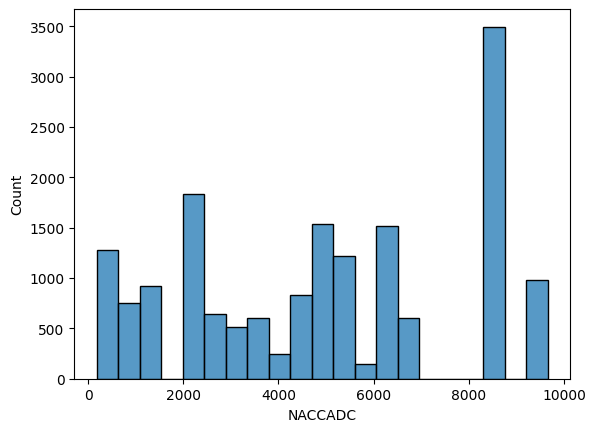

In [12]:
# check plot distrib of column NACCADC
import seaborn as sns
sns.histplot(df['NACCADC'])
plt.show()
